## Install Packages

Install the required packages that will be used in this notebook

In [1]:
!pip install --upgrade pip
!pip install matplotlib psycopg2 pandas openpyxl

## Codes to Analysis

Main code starts here. At first, we shall import all the required modules.

In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt
import numpy as np

Database connector class. It will be used to coneect to database and do different types of olap queries on data.

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user="dhiman",
                                           password="dhiman1234",
                                           host="127.0.0.1",
                                           port="5432")

    def getConnection(self):
        return self.connection

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [4]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = "SELECT s.division, s.district, t.time_year, t.time_month, SUM(f.total_price) as total_price " \
              "FROM fact_table f " \
              "JOIN store_dim s on s.store_key=f.store_key " \
              "JOIN time_dim t on t.time_key=f.time_key " \
              "GROUP BY CUBE (s.division, s.district, t.time_year, t.time_month) " \
              "ORDER BY s.division, s.district, t.time_year, t.time_month"
cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
df[4] = pd.to_numeric(df[4], errors='coerce')
print(df.head(10))

cursor.close()
connection.close()

         0        1       2     3         4
0  BARISAL  BARGUNA  2014.0   1.0   3319.25
1  BARISAL  BARGUNA  2014.0   2.0  10521.25
2  BARISAL  BARGUNA  2014.0   3.0  10872.50
3  BARISAL  BARGUNA  2014.0   4.0  11095.25
4  BARISAL  BARGUNA  2014.0   5.0  10385.25
5  BARISAL  BARGUNA  2014.0   6.0   8039.25
6  BARISAL  BARGUNA  2014.0   7.0   9423.50
7  BARISAL  BARGUNA  2014.0   8.0  11293.25
8  BARISAL  BARGUNA  2014.0   9.0   8340.50
9  BARISAL  BARGUNA  2014.0  10.0  11023.75


For visualization purpose let us analyse specific datasets by plotting them.

#### Division wise total sale

               0            4
741      BARISAL   7520343.75
2013  CHITTAGONG  19763595.00
3921       DHAKA  40764619.75
5087      KHULNA  11311610.50
6041    RAJSHAHI  12099196.00
6995     RANGPUR   8429836.50
7525      SYLHET   5512234.25


Text(0, 0.5, 'Total Sale')

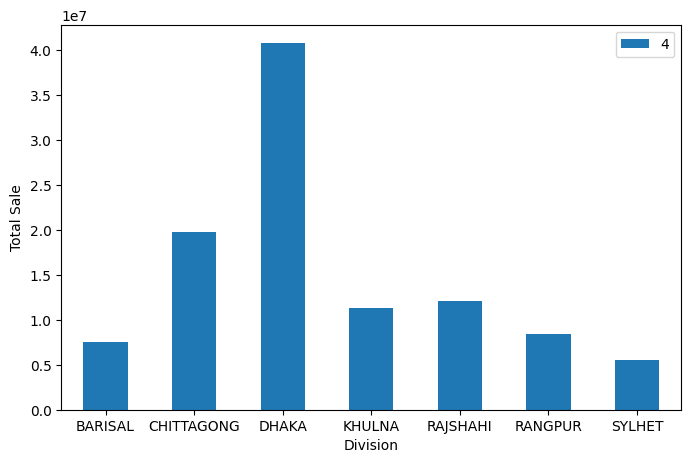

In [5]:
div_df = df[df[1].isna()]
div_df = div_df[div_df[2].isna()]
div_df = div_df[div_df[3].isna()]
div_df = div_df.drop([1, 2, 3], axis=1)
div_df = div_df.dropna()

print(div_df.head(10))

fig = div_df.plot.bar(x=0, y=4, figsize=(8, 5), rot=0)
fig.set_xlabel("Division")
fig.set_ylabel("Total Sale")

#### District Wise Total sales analysis

                     1           4
7631          BAGERHAT  1307651.00
7737         BANDARBAN   995360.75
7843           BARGUNA   869041.00
7949           BARISAL  2897237.75
8055             BHOLA  1012205.75
8161             BOGRA  1716452.75
8267      BRAHMANBARIA  1328234.25
8373          CHANDPUR  1153276.75
8479  CHAPAI NABABGANJ   739447.50
8585        CHITTAGONG  7292985.50


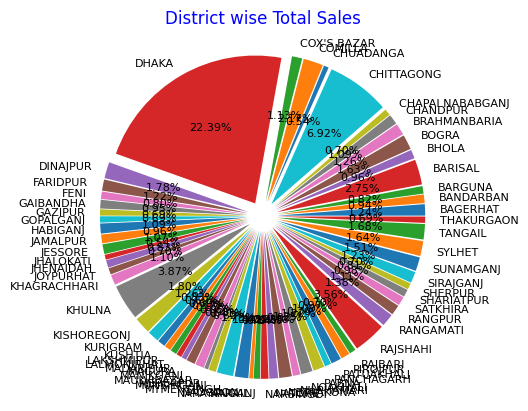

In [6]:
dis_df = df[df[0].isna()]
dis_df = dis_df[dis_df[2].isna()]
dis_df = dis_df[dis_df[3].isna()]
dis_df = dis_df.drop([0, 2, 3], axis=1)
dis_df = dis_df.dropna()

print(dis_df.head(10))

textprops = {"fontsize": 8}
plt.title('District wise Total Sales', loc='center', color='b')
plt.pie(dis_df[4], labels=dis_df[1], textprops=textprops, autopct='%.2f%%', explode=[0.1 for x in dis_df[4]])
plt.rcParams["figure.figsize"] = (15, 15)
plt.show()

#### Year Wise total Sale analysis

            2            4
14322  2014.0  14334731.25
14335  2015.0  15095720.25
14348  2016.0  14976508.25
14361  2017.0  15015806.00
14374  2018.0  15108197.25
14387  2019.0  14949510.25
14400  2020.0  15037190.25
14402  2021.0    883772.25


Text(0.5, 0, 'Total Sale')

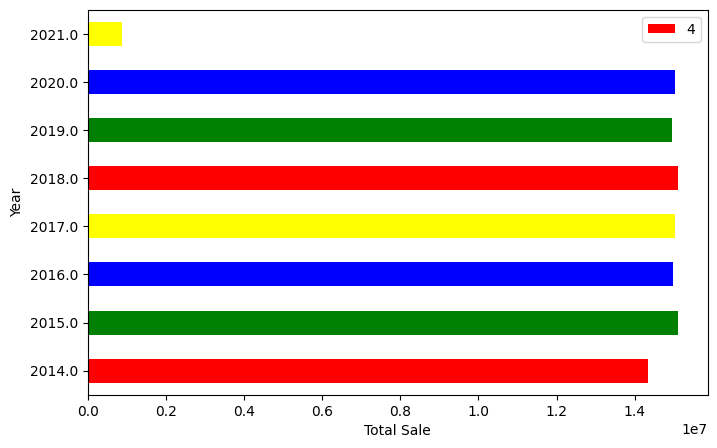

In [7]:
yr_df = df[df[0].isna()]
yr_df = yr_df[yr_df[1].isna()]
yr_df = yr_df[yr_df[3].isna()]
yr_df = yr_df.drop([0, 1, 3], axis=1)
yr_df = yr_df.dropna()

print(yr_df.head(10))

fig = yr_df.plot.barh(x=2, y=4, figsize=(8, 5), color=['red', 'green', 'blue', 'yellow'])
fig.set_ylabel("Year")
fig.set_xlabel("Total Sale")

#### Month Wise total Sale analysis

            2     3           4
14310  2014.0   1.0   496549.25
14311  2014.0   2.0  1122547.00
14312  2014.0   3.0  1262435.75
14313  2014.0   4.0  1245142.50
14314  2014.0   5.0  1268770.50
14315  2014.0   6.0  1240771.75
14316  2014.0   7.0  1317296.00
14317  2014.0   8.0  1293211.00
14318  2014.0   9.0  1279444.25
14319  2014.0  10.0  1299793.50


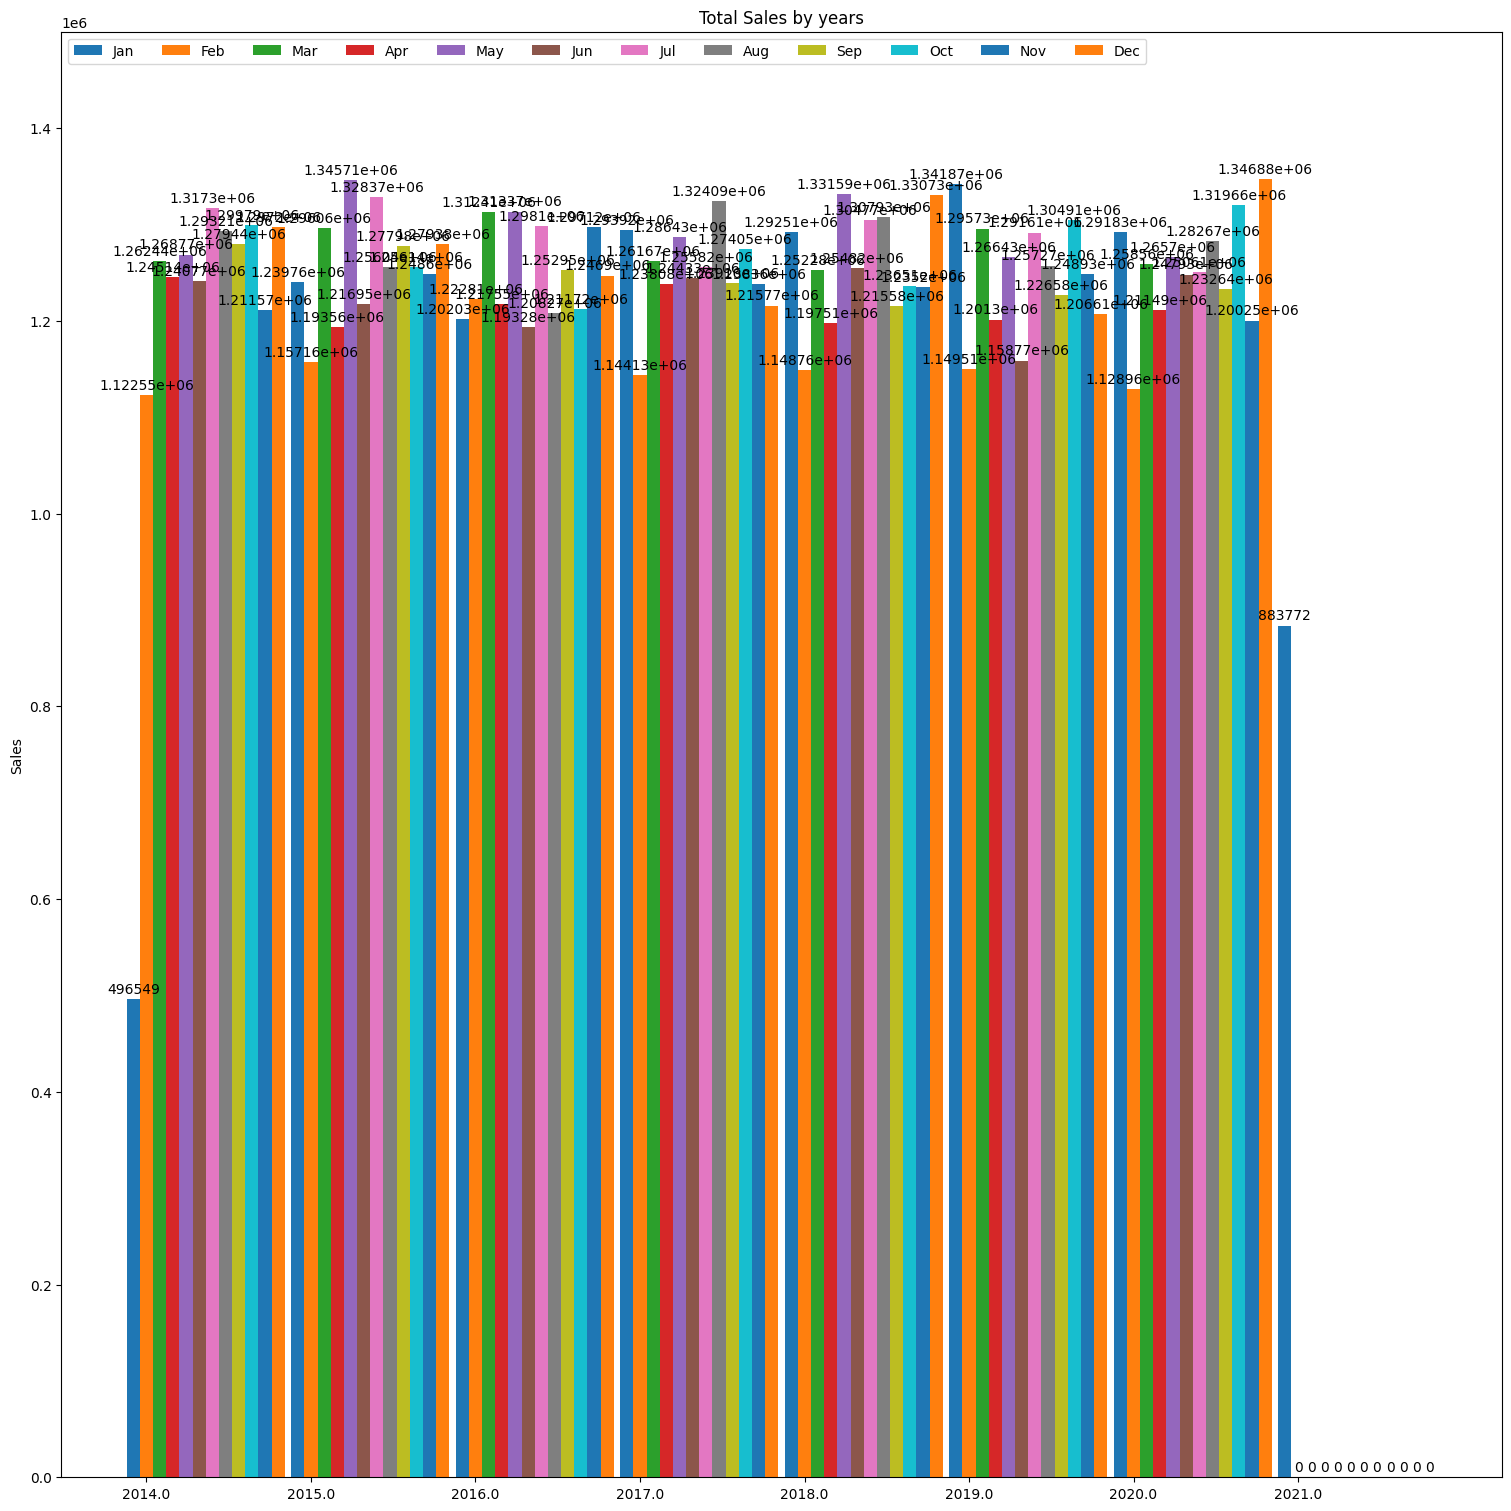

In [8]:
yr_df = df[df[0].isna()]
yr_df = yr_df[yr_df[1].isna()]
yr_df = yr_df.drop([0, 1], axis=1)
yr_df = yr_df.dropna()

print(yr_df.head(10))

months = ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
month_ids = {"1.0": "Jan", "2.0": "Feb", "3.0": "Mar", "4.0": "Apr", "5.0": "May", "6.0": "Jun",
             "7.0": "Jul", "8.0": "Aug", "9.0": "Sep", "10.0": "Oct", "11.0": "Nov", "12.0": "Dec"}
year_ids = {"2014.0": 0, "2015.0": 1, "2016.0": 2, "2017.0": 3, "2018.0": 4, "2019.0": 5, "2020.0": 6, "2021.0": 7}

sales_by_month = {
}

for month in months:
    sales_by_month[month] = []
    for year in range(8):
        sales_by_month[month].append(0)

for index, row in yr_df.iterrows():
    sales_by_month[month_ids[str(row[3])]][year_ids[str(row[2])]] = row[4]

x = np.arange(len(year_ids))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for month, sales in sales_by_month.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, sales, width, label=month)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sales')
ax.set_title('Total Sales by years')
ax.set_xticks(x + width, year_ids.keys())
ax.legend(loc='upper left', ncols=12)
ax.set_ylim(0, 1500000)

plt.show()

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [9]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = "SELECT c.customer_name, t.bank_name, t.trans_type, SUM(f.total_price) " \
              "FROM fact_table f " \
              "JOIN customer_dim c on c.customer_key=f.customer_key " \
              "JOIN trans_dim t on t.payment_key=f.payment_key " \
              "GROUP BY CUBE (c.customer_name, t.bank_name, t.trans_type) " \
              "ORDER BY c.customer_name, t.bank_name, t.trans_type"
cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
df[3] = pd.to_numeric(df[3], errors='coerce')
print(df.head(10))

cursor.close()
connection.close()

   0                                 1       2       3
0  -                   AB Bank Limited    card  329.00
1  -                   AB Bank Limited    None  329.00
2  -  Bangladesh Commerce Bank Limited    card  514.00
3  -  Bangladesh Commerce Bank Limited    None  514.00
4  -                 Bank Asia Limited    card  366.75
5  -                 Bank Asia Limited    None  366.75
6  -        Bengal Commercial Bank Ltd    card  428.00
7  -        Bengal Commercial Bank Ltd    None  428.00
8  -                             Bkash  mobile  786.00
9  -                             Bkash    None  786.00


### Q3: Total sales in Barisal for item 'Pepsi - 12 oz cans'

In [10]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''SELECT s.division, SUM(f.total_price) as total_sale_price
                 FROM fact_table f
                 JOIN store_dim s ON f.store_key = s.store_key
                 JOIN item_dim i ON f.item_key = i.item_key
                 WHERE i.item_name = 'Pepsi - 12 oz cans'
                 GROUP BY s.division
                 HAVING s.division='BARISAL' '''
cursor.execute(select_stmt)
records = cursor.fetchall()

print(records)

cursor.close()
connection.close()

[('BARISAL', Decimal('38108.50'))]


### Q4: Total sales in 2015 for supplier 'BIGSO AB'

In [11]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''SELECT t.time_year, SUM(f.total_price) as total_sale_price
                 FROM fact_table f
                 JOIN time_dim t ON f.time_key = t.time_key
                 JOIN item_dim i ON f.item_key = i.item_key
                 WHERE i.supplier = 'BIGSO AB'
                 GROUP BY t.time_year
                 HAVING t.time_year=2015 '''
cursor.execute(select_stmt)
records = cursor.fetchall()

print(records)

cursor.close()
connection.close()

[(2015, Decimal('1685691.75'))]


### Q5: Total sales of Dhaka in 2015

In [12]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''SELECT s.division, SUM(f.total_price) as total_sale_price
                 FROM fact_table f
                 JOIN store_dim s ON f.store_key = s.store_key
                 JOIN time_dim t ON f.time_key = t.time_key
                 WHERE t.time_year = 2015
                 GROUP BY s.division
                 HAVING s.division='DHAKA' '''
cursor.execute(select_stmt)
records = cursor.fetchall()

print(records)

cursor.close()
connection.close()

[('DHAKA', Decimal('5865078.75'))]


In [13]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''SELECT s.district, SUM(f.total_price) as total_sale_price
                 FROM fact_table f
                 JOIN store_dim s ON f.store_key = s.store_key
                 JOIN time_dim t ON f.time_key = t.time_key
                 WHERE t.time_year = 2015
                 GROUP BY s.district
                 HAVING s.district='DHAKA' '''
cursor.execute(select_stmt)
records = cursor.fetchall()

print(records)

cursor.close()
connection.close()

[('DHAKA', Decimal('3399121.50'))]


### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?
    S1-> item1 -> quantity_sales
    S1-> item2 -> quantity_sales
    S1-> item3 -> quantity_sales

        0                                      1    2   
0   S0001                     Pepsi - 12 oz cans   92  \
1   S0001    Muscle Milk Protein Shake Van. 11oz   90   
2   S0001              Njoy Sugar Canister 22 oz   69   
3   S0002            Altoids Small Packs Variety   80   
4   S0002    Muscle Milk Protein Shake Van. 11oz   78   
5   S0002  AquaFina Purified Drinking Water 16oz   78   
6   S0003                    Sprite - 12 oz cans  122   
7   S0003                 Diet Coke - 12 oz cans  109   
8   S0003                     Pepsi - 12 oz cans   73   
9   S0004        Kind  Bars Variety Pack 1.4 oz    79   
10  S0004    Muscle Milk Protein Shake Van. 11oz   69   
11  S0004      V8 100% Vegetable Juice 11oz cans   68   
12  S0005                 Diet Coke - 12 oz cans  144   
13  S0005           Planters Nut-trition 1.5 oz    86   
14  S0005            Stirrers Coffee Stirs 7inch   85   
15  S0006                     Pepsi - 12 oz cans   80   
16  S0006                   Adv

Text(0.5, 0, 'Total Sold Quantity')

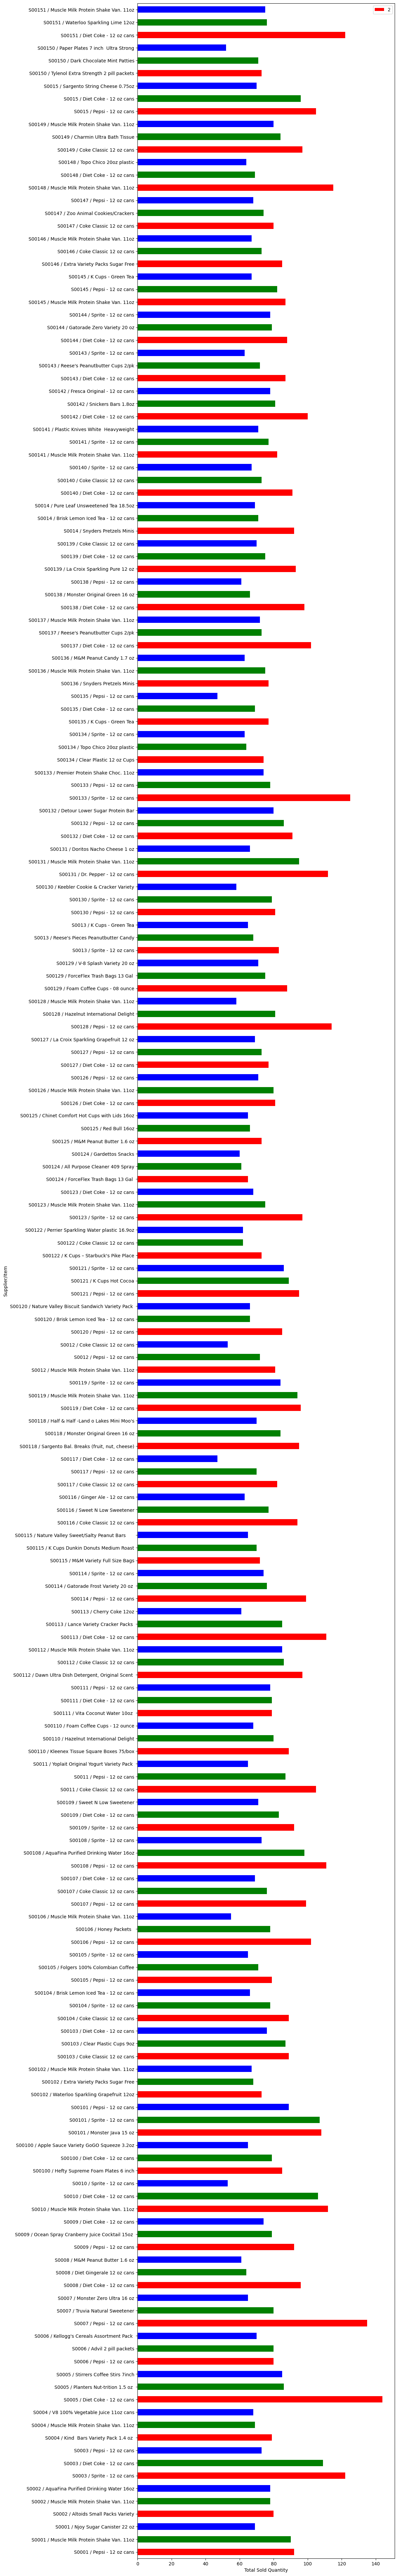

In [14]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''
                WITH sales_ranked AS (
                    SELECT s.store_key as store_key, i.item_name as item_name, SUM(f.quantity) as sales_count,
                    ROW_NUMBER() OVER (PARTITION BY s.store_key ORDER BY COUNT(*) DESC) AS sales_rank
                    FROM fact_table f
                    JOIN store_dim s on s.store_key=f.store_key
                    JOIN item_dim i on i.item_key=f.item_key
                    GROUP BY s.store_key, i.item_name
                    ORDER BY s.store_key, sales_count DESC
                )
                SELECT
                  store_key,
                  item_name,
                  sales_count
                FROM
                  sales_ranked
                WHERE
                  sales_rank <= 3
                LIMIT 201
                '''

# For visualization purpose I have used a limit on this query.

cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
df[2] = pd.to_numeric(df[2], errors='coerce')
df[3] = df[0] + ' / ' + df[1]
print(df.head(20))
print(len(df.index))

cursor.close()
connection.close()

fig = df.plot.barh(x=3, y=2, figsize=(10, 100), color=['red', 'green', 'blue'])
fig.set_ylabel("Supplier/Item")
fig.set_xlabel("Total Sold Quantity")

### Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days
    output: [item1, item2, item3, ...........]

In [17]:
input_days = 2

connection = PostgresConnection().getConnection()
cursor = connection.cursor()

select_stmt = ''' SELECT i.item_name, t.time_date, tr.trans_type
                    FROM fact_table f
                    JOIN item_dim i ON i.item_key=f.item_key
                    JOIN trans_dim tr ON tr.payment_key=f.payment_key
                    JOIN time_dim t ON t.time_key=f.time_key
                    WHERE t.time_date > ((SELECT MAX(time_date) from time_dim) - '{} days'::interval)
                    AND (tr.trans_type='card' OR tr.trans_type='mobile')
                    ORDER BY t.time_date DESC, tr.trans_type '''.format(input_days)

# print(select_stmt)

cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
print(df.head(len(df.index)))

cursor.close()
connection.close()

                                             0                   1       2
0        AquaFina Purified Drinking Water 16oz 2021-01-23 04:38:00    card
1                           Pepsi - 12 oz cans 2021-01-23 04:38:00    card
2    Sargento Bal. Breaks (fruit, nut, cheese) 2021-01-23 04:38:00    card
3          Muscle Milk Protein Shake Van. 11oz 2021-01-23 04:38:00    card
4                        Sweet N Low Sweetener 2021-01-23 04:38:00    card
..                                         ...                 ...     ...
764              Folgers 100% Colombian Coffee 2021-01-21 04:51:00    card
765                         K Cups - Green Tea 2021-01-21 04:51:00    card
766        Lunchables Variety Pack Oscar Meyer 2021-01-21 04:51:00    card
767         Chobani Greek Yogurt Variety Pack  2021-01-21 04:51:00    card
768             Gatorade Liberty Variety 12 oz 2021-01-21 04:51:00  mobile

[769 rows x 3 columns]


### Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1
       item2-> q2

In [27]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = ''' WITH sales AS
                    (SELECT time_quarter, item_key, SUM(quantity) AS total_quantity
                        FROM fact_table f
                        JOIN time_dim t ON t.time_key = f.time_key
                        GROUP BY item_key,time_quarter)
                    SELECT CONCAT(s.item_key, ' -> ',s.time_quarter, '(',total_quantity,')') as Result
                        FROM sales s
                        JOIN
                            (SELECT item_key, min(total_quantity) AS min_quantity
                            FROM sales s GROUP BY item_key) min_sales
                        ON min_sales.item_key = s.item_key and s.total_quantity = min_sales.min_quantity  '''
# print(select_stmt)

cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
print(df.head(len(df.index)))

cursor.close()
connection.close()

                      0
0    I00001 -> Q2(5735)
1    I00002 -> Q4(5589)
2    I00003 -> Q3(5606)
3    I00004 -> Q4(5521)
4    I00005 -> Q2(5286)
..                  ...
259  I00260 -> Q3(5558)
260  I00261 -> Q2(5455)
261  I00262 -> Q2(5330)
262  I00263 -> Q1(5453)
263  I00264 -> Q3(5525)

[264 rows x 1 columns]


### Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales
     item1-> division2->total_sales

In [28]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''   SELECT i.item_key, s.division, SUM(f.total_price)
                    From fact_table f
                    JOIN store_dim s on s.store_key=f.store_key
                    JOIN item_dim i on i.item_key=f.item_key
                    GROUP BY (i.item_key,s.division)    '''

# print(select_stmt)

cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
print(df.head(len(df.index)))

cursor.close()
connection.close()

           0           1         2
0     I00001     BARISAL   19101.5
1     I00001  CHITTAGONG   52060.5
2     I00001       DHAKA  107479.0
3     I00001      KHULNA   28382.0
4     I00001    RAJSHAHI   27795.5
...      ...         ...       ...
1843  I00264       DHAKA  132630.0
1844  I00264      KHULNA   37500.0
1845  I00264    RAJSHAHI   37725.0
1846  I00264     RANGPUR   27480.0
1847  I00264      SYLHET   17220.0

[1848 rows x 3 columns]


### Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales
     s1-> M2 -> avg_sales

In [29]:
connection = PostgresConnection().getConnection()
cursor = connection.cursor()
select_stmt = '''   SELECT s.store_key,t.time_month, t.time_year,AVG(f.total_price)
                    From fact_table f
                    JOIN store_dim s on s.store_key=f.store_key
                    JOIN time_dim t on t.time_key=f.time_key
                    GROUP BY (s.store_key,t.time_month, t.time_year)
                    ORDER BY t.time_year, t.time_month    '''

# print(select_stmt)

cursor.execute(select_stmt)
records = cursor.fetchall()

df = pd.DataFrame(list(records))
print(df.head(len(df.index)))

cursor.close()
connection.close()

           0  1     2                     3
0      S0001  1  2014  116.2000000000000000
1      S0002  1  2014   62.3750000000000000
2      S0003  1  2014  120.5833333333333333
3      S0004  1  2014   55.0000000000000000
4      S0005  1  2014   45.2500000000000000
...      ... ..   ...                   ...
61704  S0095  1  2021  123.5000000000000000
61705  S0096  1  2021  121.9500000000000000
61706  S0097  1  2021   96.7666666666666667
61707  S0098  1  2021  123.8461538461538462
61708  S0099  1  2021  100.6718750000000000

[61709 rows x 4 columns]
